**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academic Study_**: Bernoulli and Binomial Distribution

# Bernoulli and Binomial Distribution

In [1]:
import random
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import bernoulli, binom

## Bernoulli Distribution

The Bernoulli Distribution is related to success (1 - True) and failure (0 - False). In this context, the test is related to the result of a single experiment.

### Probability Mass Function (PMF)

$$
P(X = x)=
\begin{cases}
p^{x}*(1-p)^{(1-x)}, & \quad \text{if } x = 0 (Failure), 1 (Success)\\ 
0 & \quad \text{if x = otherwise}
\end{cases}
$$

In [2]:
def bernoulli_pmf(x, p):
    """ 
    x: indicates success (1) or failure (0)
    p: percentage off success
    """
    return p**x*(1-p)**(1-x)

In [3]:
p = 0.3
success = bernoulli_pmf(1, p)
failure = bernoulli_pmf(0, p)
print(success, failure)

0.3 0.7


### Probability Mass Function Chart

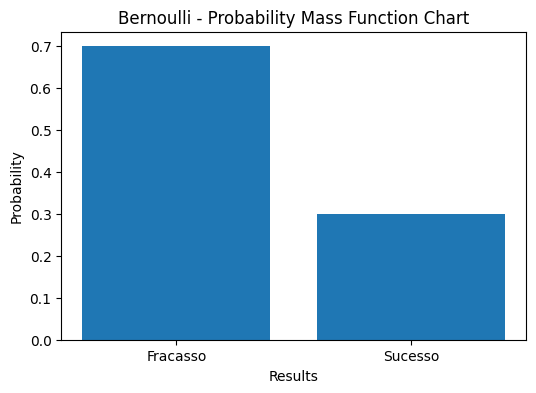

In [4]:

bernoulli_x = ["Fracasso","Sucesso"]
bernoulli_y = [bernoulli_pmf(0, p), bernoulli_pmf(1, p)]

plt.figure(figsize=(6,4))
plt.bar(bernoulli_x,bernoulli_y)
plt.title("Bernoulli - Probability Mass Function Chart")
plt.xlabel("Results")
plt.ylabel("Probability")
plt.show()

### Expectation (E(X))

As it is a discrete variable, the expectation of the bernoulli distribution can be calculated as follows:

$$\mu = E(x) = \sum^{i}_{x=0} xP(x) = 0.P(0) + 1.P(1) = p^{1}*(1-p)^{1-1} = p$$

In [5]:
def bernoulli_expectation(p):
    return p

### Variance (Var(X))


$$\sigma^{2} = Var(X) = \frac{\sum^{i}_{x=0} E[(x_{i} - E(X))^{2}]}{n} = E[X^{2}] - (E[X])^{2}$$

$$ = (0^{2}.p(0) + 1^{2}.p(1)) - (0.p(0) + 1.p(1))^{2}$$

$$= p(1) - p(1)^{2}$$

$$= p - p^{2}$$

$$ = p(1-p)$$

In [6]:
def bernoulli_variance(p):
    return p*(1-p)

### Standard Deviation (STD(X))

$$STD(X) = \sqrt{\sigma^{2}(X)}$$

In [7]:
def bernoulli_std(p):
    return bernoulli_variance(p)**(1/2)

### TESTING

In [8]:
p = 0.3

In [9]:
# Example

# Hard Coded
bernoulli_randomic = random.random()
if bernoulli_randomic <= p:
    bernoulli_randomic = np.array([1]) # Success
else:
    bernoulli_randomic = np.array([0]) # Failure


# Scipy
bernoulli_scipy = bernoulli(p).rvs(size=1)

# Numpy
bernoulli_numpy = np.random.binomial(1, p, size=1)

print("Drawn Value (HardCoded): ", bernoulli_randomic)
print("Drawn Value (Scipy): ", bernoulli_scipy)
print("Drawn Value (Numpy): ", bernoulli_numpy)

Drawn Value (HardCoded):  [1]
Drawn Value (Scipy):  [1]
Drawn Value (Numpy):  [0]


In [10]:
# Scipy
bernoulli_scipy = bernoulli(p).rvs(size=1)
# Numpy
bernoulli_numpy = np.random.binomial(1, p, size=1)

In [11]:
print("HARD CODED")
print(f"p = {p}")
print("Success (p): ", bernoulli_pmf(1,p))
print("Failure (1-p): ", bernoulli_pmf(0,p))
print("E(X): ", bernoulli_expectation(p))
print("Var(X): ", bernoulli_variance(p))
print("STD(X): ", bernoulli_std(p))

HARD CODED
p = 0.3
Success (p):  0.3
Failure (1-p):  0.7
E(X):  0.3
Var(X):  0.21
STD(X):  0.458257569495584


In [12]:
print("SCIPY")
print(f"p = {p}")
print("Success (p): ", p)
print("Failure (1-p): ", 1-p)
print("E(X): ", bernoulli.mean(p, loc=0))
print("Var(X): ", bernoulli.var(p, loc=0))
print("STD(X): ", bernoulli.std(p, loc=0))


SCIPY
p = 0.3
Success (p):  0.3
Failure (1-p):  0.7
E(X):  0.3
Var(X):  0.21
STD(X):  0.458257569495584


## Binomial Distribution

The binomial distribution is used when we have a set of Bernoulli results. In other words, a single result is understood as Bernoulli, but a set of Bernoulli results is a Binomial distribution.

As characteristics of a binomial experiment, we have the following:

* The number of attempts is fixed (n).

* The `n` trials are independent and repeated under identical conditions. Then, in all sample events, the elements drawn or thrown will be returned to the sample space to carry out a new event.

* For each attempt there will only be two possible outcomes (`success` or `failure`).

* The probability of success will be `P('success') = p` and that of `P('failure') = 1-p`.

* The central problem of the model only covers determining the probability of `k` successes in `n` attempts.

In this case, we can calculate probabilities such as getting 4 out of 10 questions right on a test.

### Probabily Mass Function (PMF)

$$f(k; n, p) = \binom{n}{k}p^{k}(1-p)^{n-k}$$
    
$$ = \dfrac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$$

In [13]:
p = 0.5
n = 10

In [14]:
def binomial_pmf(p, n, k):
    """ 
    n: number of experiments
    k: number of successfull experiments
    p: percentage off success
    """
    numerator = math.factorial(n)
    denominator = math.factorial(k)*math.factorial(n-k)
    binomial = numerator/denominator
    s = p**k
    f = (1-p)**(n-k)
    return binomial*s*f

In [15]:
binomial_x = [x for x in range(n)]
binomial_y = [binomial_pmf(p, n, k) for k in binomial_x]

print(binomial_x)
print(binomial_y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.0009765625, 0.009765625, 0.0439453125, 0.1171875, 0.205078125, 0.24609375, 0.205078125, 0.1171875, 0.0439453125, 0.009765625]


### Probability Mass Function Chart

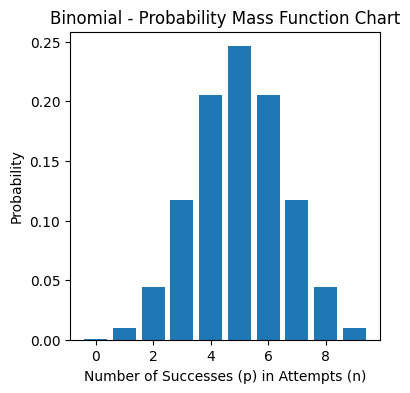

In [16]:
plt.figure(figsize=(4,4))
plt.bar(binomial_x,binomial_y)
plt.title("Binomial - Probability Mass Function Chart")
plt.xlabel("Number of Successes (p) in Attempts (n)")
plt.ylabel("Probability")
plt.show()

### Cumulative Distribution Function (CDF)

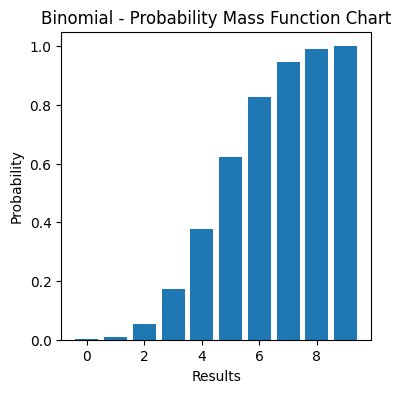

In [17]:
before = 0
binomial_y_cumulative = []
for number in binomial_y:
    before = before + number
    binomial_y_cumulative.append(before)

plt.figure(figsize=(4,4))
plt.bar(binomial_x,binomial_y_cumulative)
plt.title("Binomial - Probability Mass Function Chart")
plt.xlabel("Results")
plt.ylabel("Probability")
plt.show()

### Expectation (E(X))

The binomial expectation is calculated by calculating the expectation of each value in the set individually considered. In this case, we will have 'n' times the value of the Bernoulli distribution.

$$E(X)= n*p$$

In [18]:
def binomial_expectation(n, p):
    return n*p

In [19]:
b_expectation = binomial_expectation(n, p)
b_scipy_expectation = binom.mean(n, p, loc=0)

print("Expectation (Hard Coded): ", b_expectation)
print("Expectation (Scipy): ", b_scipy_expectation)

Expectation (Hard Coded):  5.0
Expectation (Scipy):  5.0


### Variance (Var(x))

The binomial variance is calculated by calculating the variance of each value in the set individually considered. In this case, we will have 'n' times the value of the Bernoulli distribution.

$$Var(X)= n*p*(p-1)$$

In [20]:
def binomial_variance(n,p):
    return n*p*(1-p)

In [21]:
b_var = binomial_variance(n, p)
b_scipy_var = binom.var(n, p, loc=0)

print("Variance (Hard Coded): ", b_var)
print("Variance (Scipy): ", b_scipy_var)

Variance (Hard Coded):  2.5
Variance (Scipy):  2.5


### Standard Deviation (STD(X))

In [22]:
def binomial_std(n,p):
    return binomial_variance(n,p)**(1/2)

In [23]:
b_std = binomial_std(n, p)
b_scipy_std = binom.std(n, p, loc=0)

print("STD (Hard Coded): ", b_std)
print("STD (Scipy): ", b_scipy_std)

STD (Hard Coded):  1.5811388300841898
STD (Scipy):  1.5811388300841898
